<a href="https://colab.research.google.com/github/ChikoAbillaBasya/Pembelajaran-Mesin/blob/main/Klasterisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JS04 - Klasterisasi**
---

## **Praktikum 1**
---
Download dataset `Iris.csv` terlebih dahulu

[Iris.csv](https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2FxUePALvHkIiJfbEFZdaJ%2FIris.csv?alt=media&token=bcc1e3f9-d7be-4194-8c56-bb48e93b6800)


**KMeans**

KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah yang dipilih. Proses KMeans secara manual, dapat dilihat pada tautan berikut,

[Perhitungan Manual KMeans](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2F16C2HxTFicQ5tS7aXc1Uvlu1kyvk20LSA_P-E2p47kLY%2Fedit%3Fusp%3Dsharing)

Pada modul jobsheet ini, kita akan langsung mempraktikkan pembuatan model KMeans dengan menggunakan python. Untuk modul pertama ini, kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris. Sedangkan untuk modul kedua, kita akan melakukan clustering dengan lebih advance, yaitu reduksi warna dengan data gambar

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Iris.csv to Iris (5).csv


In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [ ]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


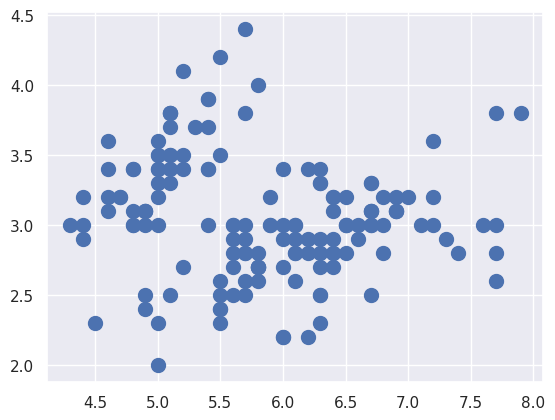

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

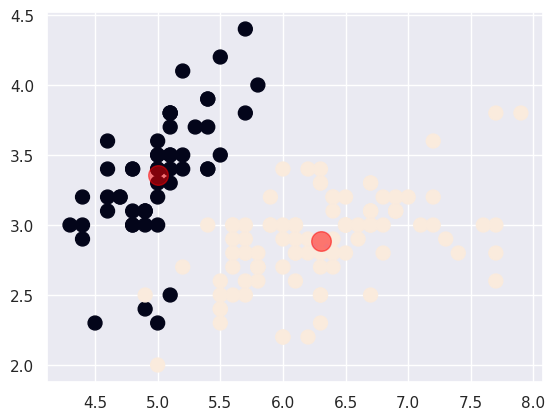

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


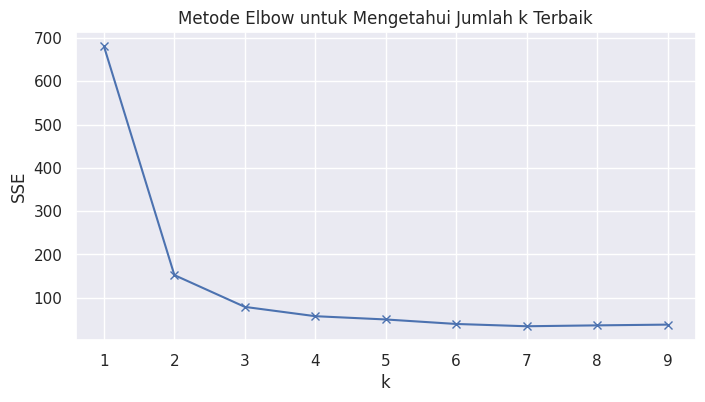

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.4732732654949
k=5; SSE=49.91714055829228
k=6; SSE=39.51795077185665
k=7; SSE=34.246992541740816
k=8; SSE=36.28039136165059
k=9; SSE=38.01399219727644


## **Praktikum 2**
---
import library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### **Pengantar k-Means**
---

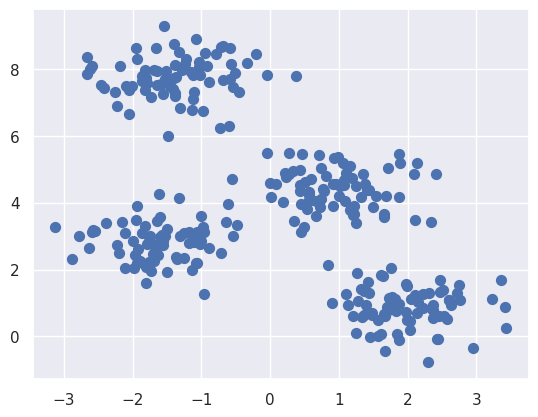

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

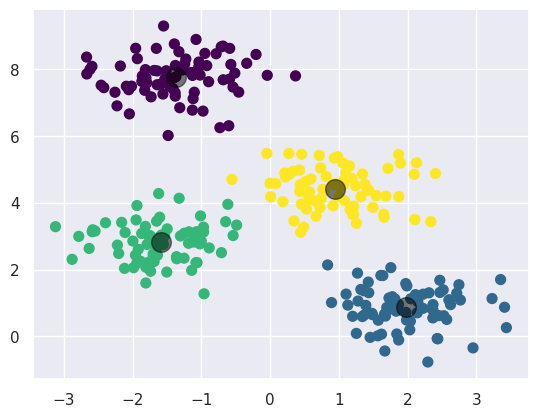

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### **Algoritma Expectation-Maximization**
---

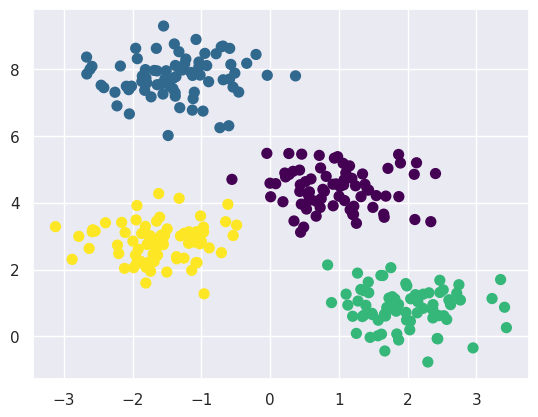

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### **Perubahan random**
---

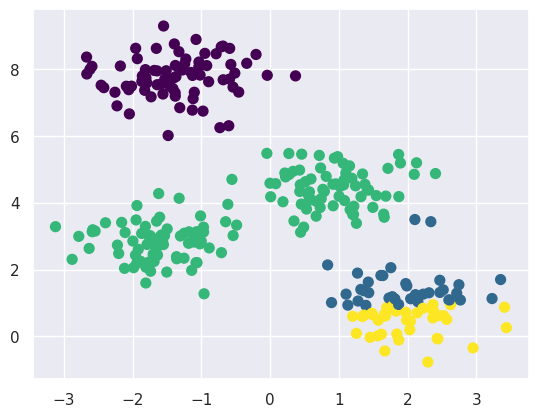

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### **Optimalisasi Jumlah Klaster**
---

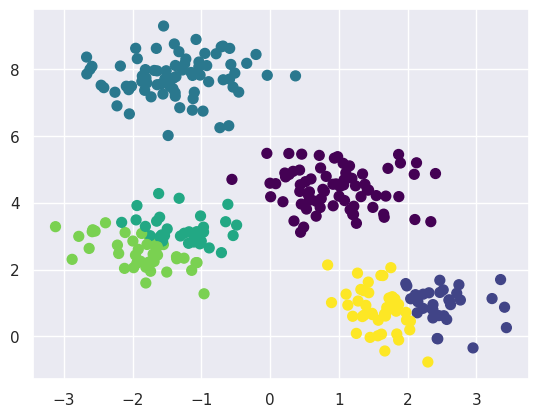

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### **Batas Klaster yang Tidak Selalu Linier**
---

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

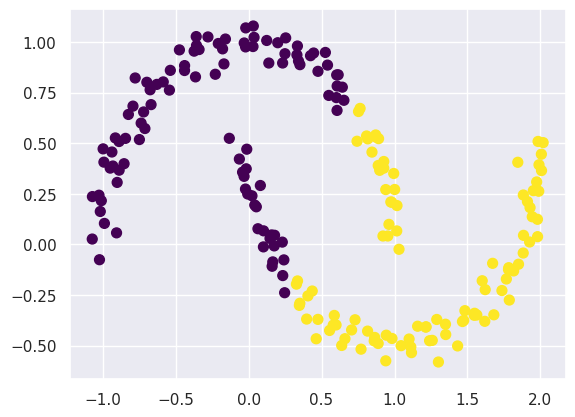

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

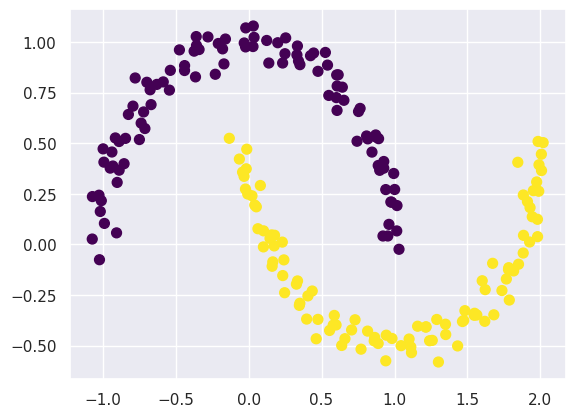

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### **Contoh Kasus 1: Karakter Angka**
---

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

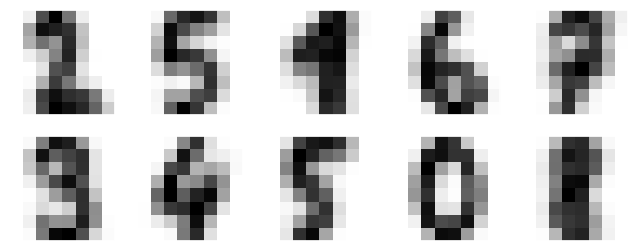

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

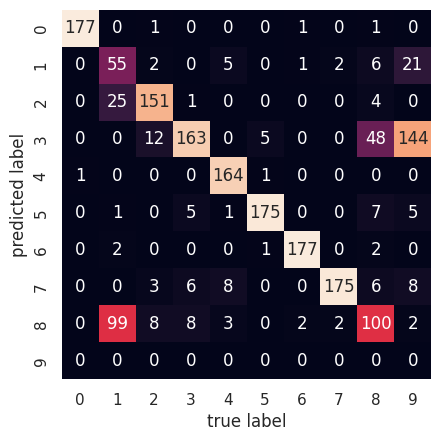

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

### **Studi Kasus 2: Kompresi Citra**
---

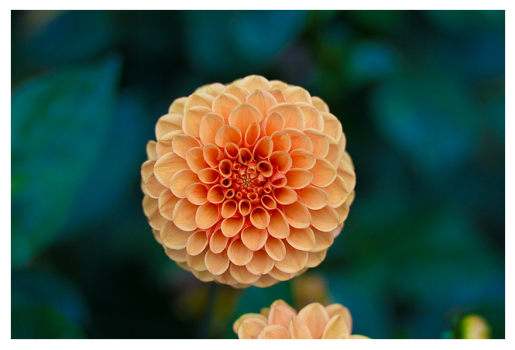

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

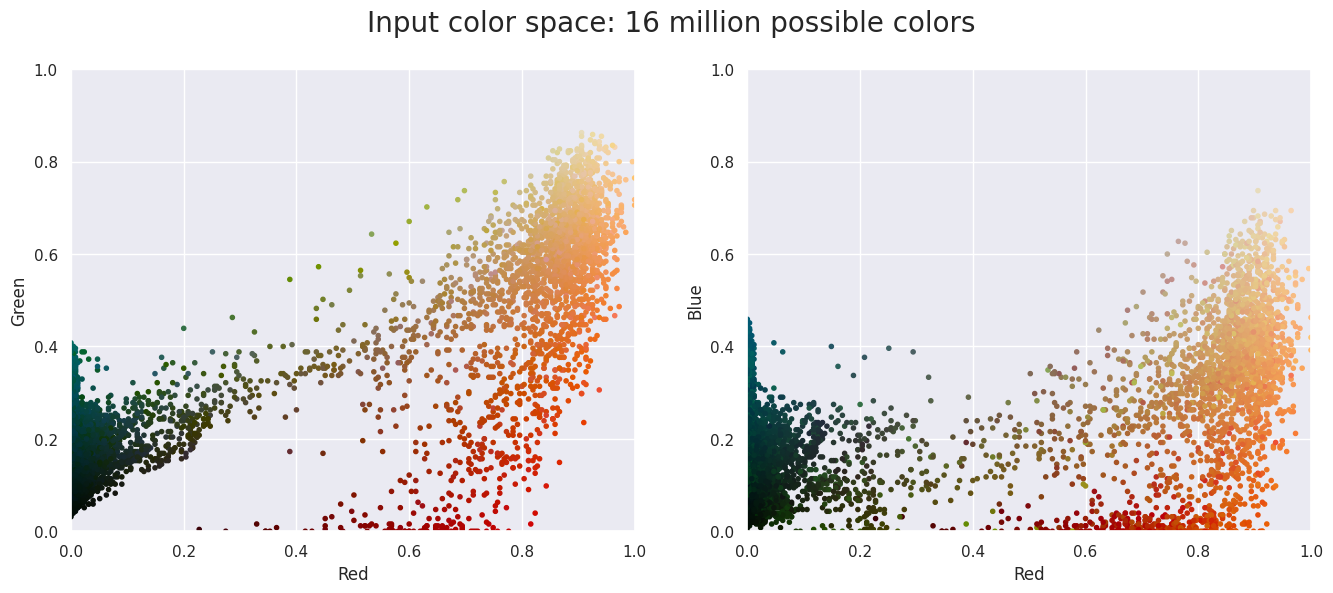

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

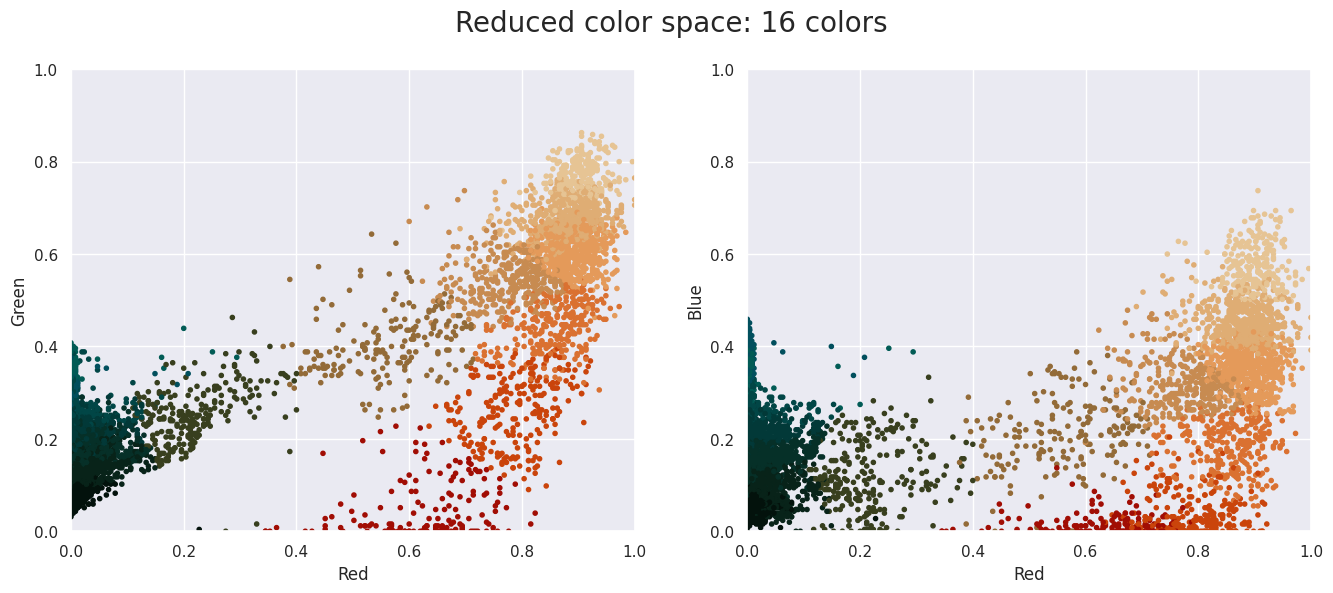

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

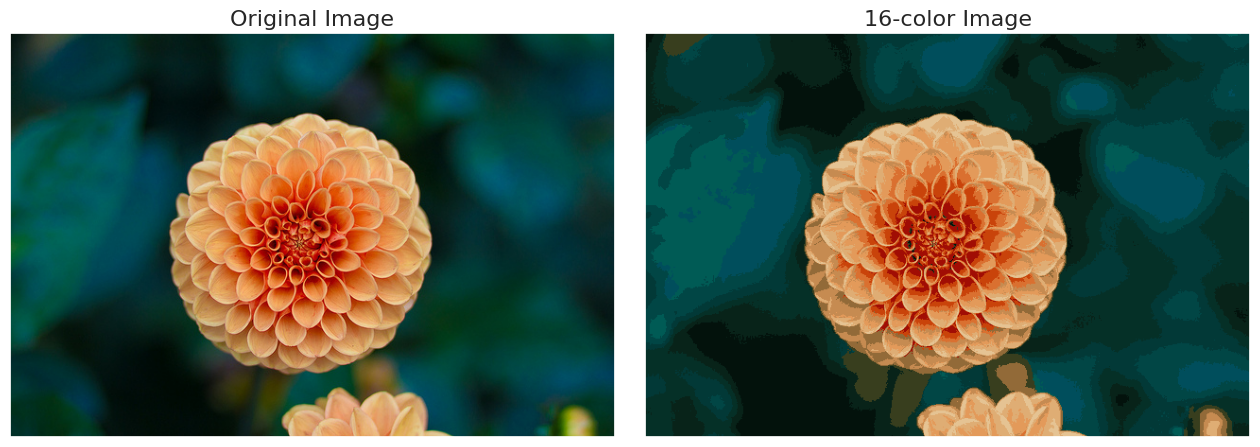

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

## **Praktikum 3**
---

Pembuatan Dataset Sintetis
Untuk mempelajari DBSCAN, kita akan membuat dataset sederhana berupa 3 klaster buatan menggunakan fungsi  [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)  dari Scikit-Learn.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Buat 3 cluster buatan
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Standarisasi data biar sebaran lebih rapi
X = StandardScaler().fit_transform(X)

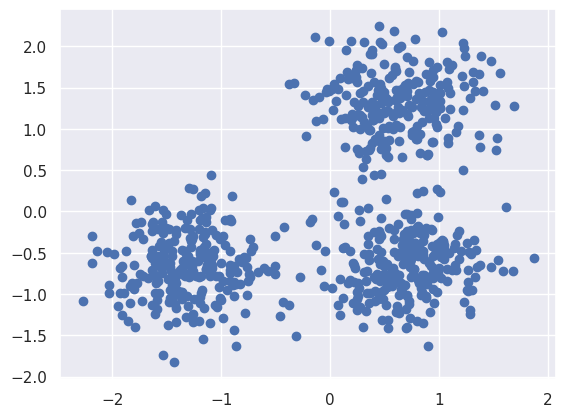

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Buat model DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Jumlah cluster (abaikan noise = -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


### **Evaluasi Kualitas Klasterisasi**
---
Karena kita menggunakan dataset sintetis (`make_blobs`), kita tahu label aslinya (`labels_true`). Ini memungkinkan kita mengukur kualitas DBSCAN dengan berbagai metrik evaluasi.

In [ ]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


* **Homogeneity** → apakah tiap klaster hanya berisi satu label asli.
* **Completeness** → apakah semua sampel dengan label asli yang sama masuk ke klaster yang sama.
* **V-measure** → rata-rata harmonik dari homogeneity dan completeness.
* **Adjusted Rand Index (ARI**) → kesesuaian antara klasterisasi dengan label asli.
* **Adjusted Mutual Information (AMI)** → kesamaan informasi antara klasterisasi dengan label asli.
* **Silhouette Coefficient** → seberapa baik data dikelompokkan (nilai mendekati 1 berarti bagus, mendekati 0 berarti berada di batas, negatif berarti salah klaster).

### **Visualisasi Hasil Klasterisasi**
---
Kita akan memvisualisasikan hasil DBSCAN.
* Core sample ditampilkan dengan titik besar.
* Non-core sample ditampilkan dengan titik kecil.
* Noise ditampilkan dengan warna hitam.

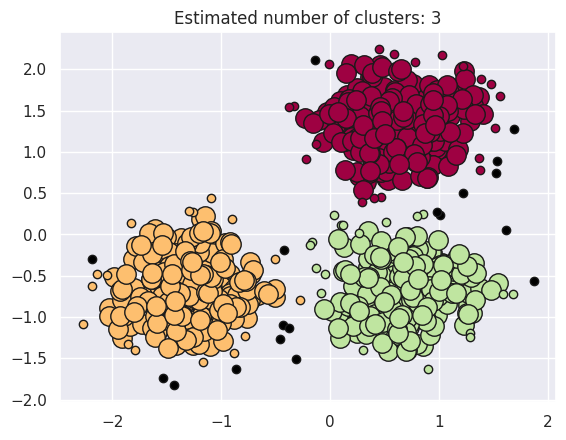

In [ ]:
# Mask untuk core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

**Interpretasi visual:**
* Titik besar berwarna → **core samples** dalam klaster.
* Titik kecil berwarna → **non-core samples**, tetap termasuk klaster.
* Titik hitam → **noise/outlier**.

## **Tugas Praktikum**
---

**1. Tugas K-Means**

Download Dataset Berikut

[Mall_Customers.csv](https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2FVIjSMZExLu0Qgychn8uw%2FMall_Customers.csv?alt=media&token=8cfe9d07-11b3-4939-a34d-1360e6ab2525)

Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
# 1. Baca dataset
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
# 2. Pilih fitur yang tepat
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

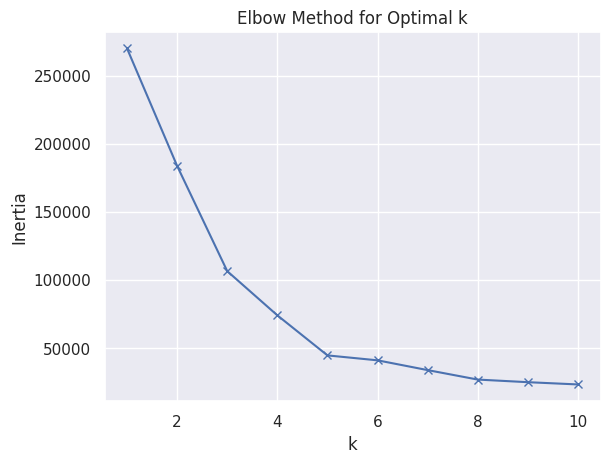

In [ ]:
# 3. Gunakan Elbow Method untuk cari k terbaik
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# 4. Buat model KMeans dengan k terbaik
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans

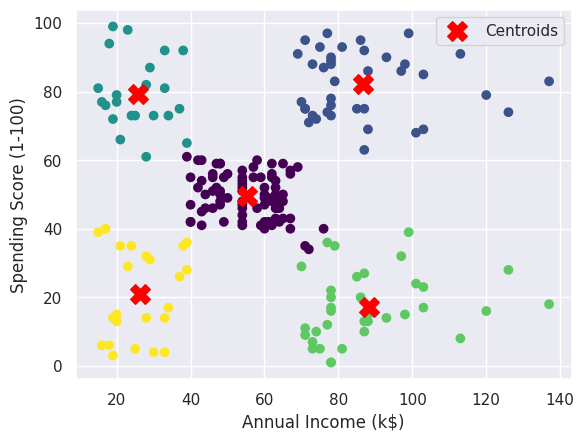

In [ ]:
# 5. Visualisasi hasil clustering
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**2. Tugas DBSCAN**

1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

5. Lakukan eksperimen:

* eps = 0.05, 0.1, 0.3, 0.5
* min_samples = 3, 10, 20
* Catat perubahan klaster, noise, dan kualitas evaluasi.

In [ ]:
# 1. Generate dataset
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import numpy as np

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

In [ ]:
# 2. DBSCAN dengan eps=0.2, min_samples=5
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah cluster: 2
Jumlah noise: 0


In [ ]:
# 3. Evaluasi clustering
from sklearn import metrics

print("Homogeneity:", metrics.homogeneity_score(y, labels))
print("Completeness:", metrics.completeness_score(y, labels))
print("V-measure:", metrics.v_measure_score(y, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))
print("AMI:", metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette:", metrics.silhouette_score(X, labels))

Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


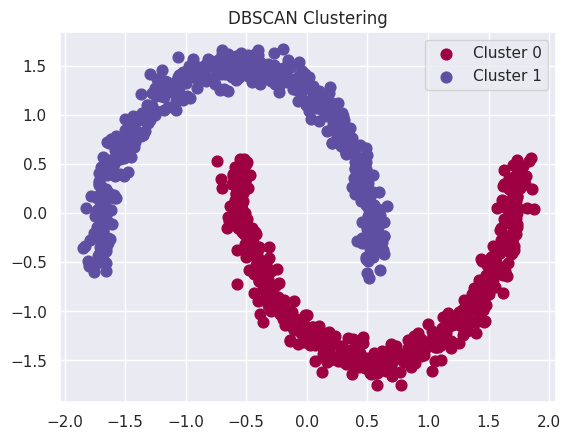

In [ ]:
# 4. Visualisasi hasilimport matplotlib.pyplot as plt
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # noise = hitam
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=60, label=f'Cluster {k}')

    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='.', s=20)

plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [ ]:
# 5. Eksperimen dengan variasi parameter
import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd

# 1. Buat dataset make_moons
X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

# 2. Parameter yang akan diuji
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

# 3. Simpan hasil di list
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        # Hati-hati: silhouette butuh >1 cluster
        if n_clusters_ > 1:
            silhouette = metrics.silhouette_score(X, labels)
        else:
            silhouette = np.nan

        results.append({
            "eps": eps,
            "min_samples": min_samples,
            "clusters": n_clusters_,
            "noise": n_noise_,
            "homogeneity": metrics.homogeneity_score(labels_true, labels),
            "completeness": metrics.completeness_score(labels_true, labels),
            "v_measure": metrics.v_measure_score(labels_true, labels),
            "ARI": metrics.adjusted_rand_score(labels_true, labels),
            "AMI": metrics.adjusted_mutual_info_score(labels_true, labels),
            "silhouette": silhouette
        })

# 4. Tampilkan hasil sebagai tabel
df_results = pd.DataFrame(results)
pd.set_option("display.max_rows", None)
print(df_results)

     eps  min_samples  clusters  noise  homogeneity  completeness  v_measure  \
0   0.05            3        69    186     0.815554      0.152548   0.257021   
1   0.05           10         3    970     0.030669      0.126764   0.049389   
2   0.05           20         0   1000     0.000000      1.000000   0.000000   
3   0.10            3         2     14     0.986207      0.902896   0.942714   
4   0.10           10         7     57     0.943317      0.409546   0.571132   
5   0.10           20         6    850     0.153928      0.155466   0.154693   
6   0.30            3         2      0     1.000000      1.000000   1.000000   
7   0.30           10         2      0     1.000000      1.000000   1.000000   
8   0.30           20         2      0     1.000000      1.000000   1.000000   
9   0.50            3         2      0     1.000000      1.000000   1.000000   
10  0.50           10         2      0     1.000000      1.000000   1.000000   
11  0.50           20         2      0  